In [1]:
from utilities.setup_environment import *
from utilities.utilities import *
from utilities.plotting import *
from utilities.getStim import *
pd.set_option('display.max_columns', None)

import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_context("poster")
from scipy.stats import sem
import os

In [2]:

cell_text = True # prints cellname next to the plot
frame_rate = 60


In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Get all files matching *_PSD_gain.csv
csv_files = [f for f in os.listdir("results") if f.endswith(".csv")]


['OFF_sustained_alpha_PSD_Gain.csv',
 'OFF_transient_alpha_PSD_Gain.csv',
 'ON_alpha_PSD_Gain.csv']


Processing: OFF sustained alpha 
Converted the following columns to NumPy arrays:
  - freq
  - stim_psd
  - rs_spikes_psd
  - nr_spikes_psd
  - H_f_power_rs
  - H_f_power_nr
  - stim_autocorr
  - spikes_autocorr_rs
  - spikes_autocorr_nr

Processing: OFF transient alpha 
Converted the following columns to NumPy arrays:
  - freq
  - stim_psd
  - rs_spikes_psd
  - nr_spikes_psd
  - H_f_power_rs
  - H_f_power_nr
  - stim_autocorr
  - spikes_autocorr_rs
  - spikes_autocorr_nr

Processing: ON alpha 
Converted the following columns to NumPy arrays:
  - freq
  - stim_psd
  - rs_spikes_psd
  - nr_spikes_psd
  - H_f_power_rs
  - H_f_power_nr
  - stim_autocorr
  - spikes_autocorr_rs
  - spikes_autocorr_nr


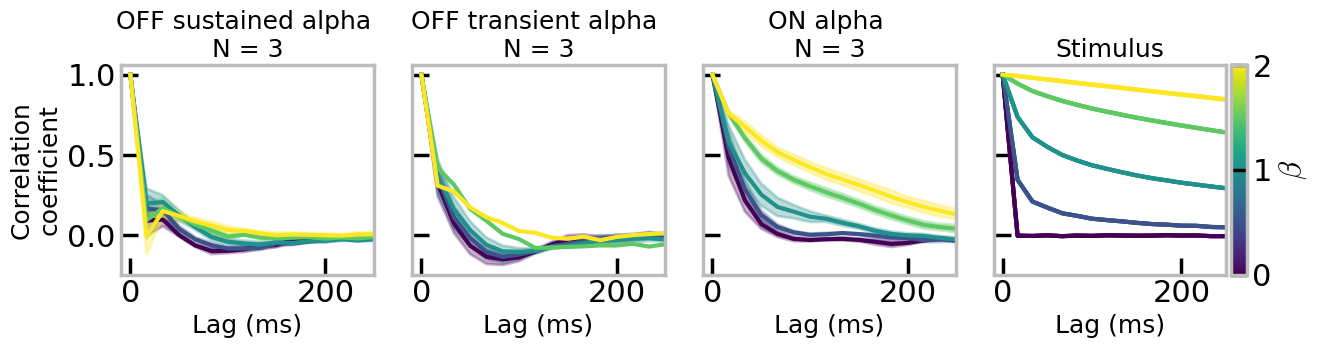

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharey=True)
for i, file in enumerate(csv_files):
    cell_type_str = file.replace("_", " ")
    cell_type = cell_type_str.replace("PSD Gain.csv", "")
    print(f"\nProcessing: {cell_type}")

    df_celltype = pd.read_csv(os.path.join("results", file))
    df_celltype = convert_stringified_arrays(df_celltype)

    beta_values = sorted(df_celltype['beta'].unique())
    norm = mcolors.Normalize(vmin=min(beta_values), vmax=max(beta_values))
    cmap = plt.get_cmap('viridis')
    label_fontsize = 18
    n_cells = df_celltype['cell_name'].nunique()

    for beta_value in beta_values:
        color = cmap(norm(beta_value))
        data_beta = df_celltype[df_celltype['beta'] == beta_value]
        stim_autocorr = data_beta['stim_autocorr'].iloc[0]
        spks_acc_stk = np.stack(data_beta['spikes_autocorr_nr'].values)

        mean_spk_cc = np.mean(spks_acc_stk, axis=0)
        sem_spk_cc = np.std(spks_acc_stk, axis=0) / np.sqrt(len(data_beta))

        time_axis = np.arange(len(mean_spk_cc)) * (1000 / frame_rate)

        axes[3].plot(time_axis, stim_autocorr, c=color, label=fr'$\beta = {beta_value}\ \mathrm{{Stim}}$')
        axes[i].fill_between(time_axis, mean_spk_cc - sem_spk_cc, mean_spk_cc + sem_spk_cc, color=color, alpha=.3)
        axes[i].plot(time_axis, mean_spk_cc, c=color, label=fr"$\beta = {beta_value}$")

    # Titles, labels, formatting
    axes[i].set_title(f'{cell_type}\nN = {n_cells}', fontsize=label_fontsize)
    axes[3].set_title('Stimulus', fontsize=label_fontsize)
    if i == 0:
        axes[i].set_ylabel('Correlation\ncoefficient', fontsize=label_fontsize)

for ax in axes:
    ax.set_facecolor('white')
    ax.grid(False)
    ax.set_xlabel('Lag (ms)', fontsize=label_fontsize)
    ax.set_yticks([0, 0.5, 1])
    ax.set_xlim(-10, 250)

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
divider = make_axes_locatable(axes[3])
cax = divider.append_axes("right", size="7%", pad=0.05)
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label(r'$\beta$', fontsize=22)

plt.tight_layout()
plt.show()
